In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load data
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target

In [3]:
df.columns = [
    'sepal length', 'sepal width', 'petal length', 'petal width', 'label'
]
df.label.value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

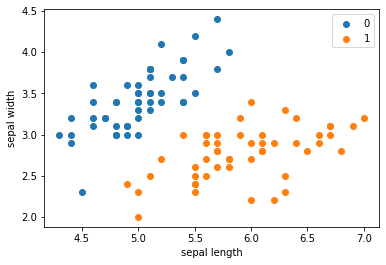

In [4]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [5]:
df

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
data = np.array(df.iloc[:100, [0, 1, -1]])

In [7]:
X, y = data[:, :-1], data[:, -1]

In [8]:
y = np.array([1 if i == 1 else -1 for i in y])

# Perceptron

In [9]:
#数据线性可分，二分类数据
#此处为一元一次方程
class Model:
    def __init__(self):
        self.w = np.ones(len(data[0]) - 1, dtype=np.float32)
        self.b = 0
        self.l_rate = 0.1
        
    def sign(self, x, w, b):
        y = np.dot(x, w) + b
        return y
    
    #随机梯度下降法
    def fit(self, X_train, y_train):
        is_wrong = False
        while not is_wrong:
            wrong_count = 0
            for d in range(len(X_train)):
                x = X_train[d]
                y = y_train[d]
                if y * self.sign(x, self.w, self.b) <= 0:
                    self.w = self.w + self.l_rate * np.dot(y, x)
                    self.b = self.b + self.l_rate * y
                    wrong_count += 1
            if wrong_count == 0:
                is_wrong = True
        return 'Perception Model!'
    
    def score(self):
        pass

In [10]:
perceptron = Model()
perceptron.fit(X, y)

'Perception Model!'

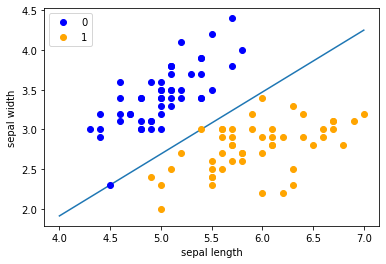

In [11]:
x_points = np.linspace(4, 7, 10)
y_ = -(perceptron.w[0] * x_points + perceptron.b) / perceptron.w[1]
plt.plot(x_points, y_)

plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [13]:
import sklearn
from sklearn.linear_model import Perceptron

In [14]:
sklearn.__version__

'0.23.1'

In [16]:
clf = Perceptron(fit_intercept=True,
                 max_iter=1000,
                 shuffle=True)
clf.fit(X, y)

Perceptron()

In [17]:
clf.coef_

array([[ 23.2, -38.7]])

In [18]:
clf.intercept_

array([-5.])

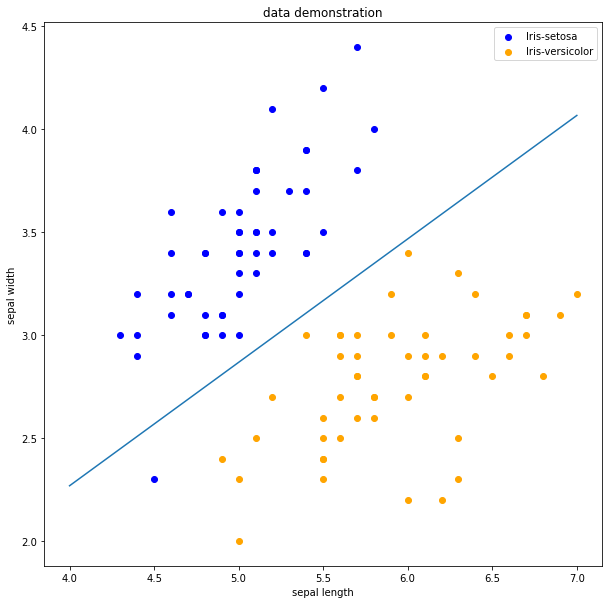

In [22]:
#画布大小
plt.figure(figsize=(10, 10))

#中文标题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.title('data demonstration')

plt.scatter(data[:50, 0], data[:50, 1], c='b', label='Iris-setosa')
plt.scatter(data[50:100, 0], data[50:100, 1], c='orange', label='Iris-versicolor')

#画感知机的线
x_points = np.arange(4, 8)
y_ = -(clf.coef_[0][0]*x_points + clf.intercept_) / clf.coef_[0][1]
plt.plot(x_points, y_)

#其他部分
plt.legend()
plt.grid(False)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [25]:
X.shape

(100, 2)

In [24]:
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])